In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted)) #calculate the derivative, find the gradient
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad # Adjusted weight
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%20==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

# w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

In [67]:
test_data = pd.read_csv("HW-1-Data-1/test_data.csv")

x = test_data['x'].values.reshape(x.shape[0],1)

Y = test_data['y'].values.reshape(Y.shape[0],)
Y

array([-5.99959370e+01,  2.60812150e+01, -2.17483230e+00, -6.62473800e+00,
        2.61658760e+00,  5.04445300e+01,  1.90830210e+01, -5.62887900e+00,
        1.29720830e+01, -1.75190530e+01, -7.79382000e+00, -1.33226850e+01,
        4.25656740e+01,  1.63800200e+01, -5.90174900e+00, -4.74497130e+00,
       -5.36431540e+01,  2.99673460e+01,  6.34908300e-01,  1.93365250e+01,
       -2.29361650e+01,  1.50338590e+01, -6.79877950e+00,  4.62876320e-01,
        3.30576020e+01,  4.27962900e-01, -3.38859600e+01, -3.06604730e+01,
        1.88755530e+01, -7.69680700e+00, -5.41571430e+01,  2.57164080e+01,
       -5.27498700e+01, -2.45730420e+01,  1.97596630e+01, -4.44732600e+01,
       -1.01443110e+01, -1.05002900e+02,  5.14991470e+00, -4.31453550e+01,
        1.27107730e+01, -8.94330800e+01,  1.75520700e+01, -4.59383400e+00,
        3.49149480e+01,  1.68610340e+01, -3.12993220e+00,  1.25437400e+01,
        1.79908770e+01, -2.03763850e+01,  3.99749100e+01,  5.98488120e+01,
       -6.44430200e+01,  

In [58]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(x,Y.reshape(Y.shape[0],),200)

In [49]:
print(w,b,cost)

[14.09720619] -3.493867435253425 318.9708861569854


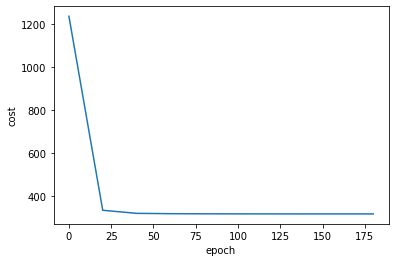

In [54]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [69]:
from numpy import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%10==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(x,Y.reshape(Y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([14.02564984]), -2.5422305860774337, 78.77359351287154)

In [71]:
def predict(x,w,b):

    y = w[0] * scaled_X[0]  + b
    return y
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]


predict([3.7707396],w,b)

AttributeError: 'list' object has no attribute 'transform'